In [1]:
%matplotlib inline

# Adds the above directory to system path 
import sys
sys.path.append('../../duq/mcmc_regression/')

# Importing the Bayesian LR module
from BR_GaussPy import *

sys.path.append('../../duq/')
import pre


# To embed video
from IPython.display import Video

seed = 1234                  # Assign a value to the seed
pre.set_seed(seed)  

# Import Dataset

In [2]:
def f(x):
    """ Function to plot a damped sinusoid """ 
    A = 2         # Initial amplitude
    lamb = 0.2    # Decay constant
    w = 2         # Angular frequency
    phi = 0       # Phase angle at t=0
    flipped = False # Whether to flip the x axis or not
    res = A*np.exp(-lamb*x)*(np.cos(w*x+phi) + np.sin(w*x + phi))
    if flipped: res = np.flip(res)
    return res

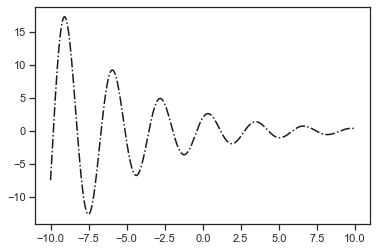

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-10,10,1000)
Y = f(X)

plt.plot(X,Y,'k-.')

df = pd.DataFrame({"X":X,"Y":Y})

x_cols=[0]
y_cols=[1]
component = 0 # Sort by the x component 
cutoff_percentile = (0.5,0.5)
val_split = 0.2
component_name = "Y"

df, data_mean, data_std = pre.process_df_euclid(df=df, x_cols=x_cols)

y_mean = data_mean[y_cols].values
x_mean = data_mean[x_cols].values
y_std = data_std[y_cols].values
x_std = data_std[x_cols].values

TRAIN, VAL, TEST = pre.split_data(df, component=component, y_cols=y_cols, x_cols=x_cols, cutoff_percentile=cutoff_percentile, val_split=val_split, seed=seed)
x_train, y_train, train_data, train_indices = TRAIN
x_val, y_val, val_data, val_indices = VAL
x_test, y_test, test_data, test_indices = TEST

x_train = pre.unnormalise(x_train, x_mean, x_std)
y_train = pre.unnormalise(y_train, y_mean, y_std)

200


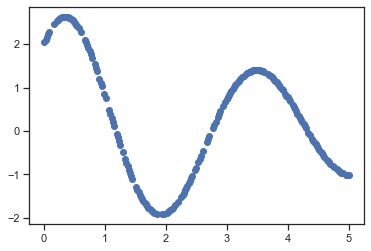

In [18]:
X_plot = x_train.numpy().squeeze()
print(len(x_train))
Y_plot = y_train.numpy().squeeze()
plt.plot(X_plot,Y_plot,'o');

# Instantiate BRG Class

In [5]:
dataset = [X_plot, Y_plot]
BRG = BR_Gauss(dataset) # Where dataset = [X, Y]

# Run MCMC Sampling

In [6]:
scaling = True
chain = BRG.MCMC_Metropolis_Hastings(num_gaussians=4,scaling=scaling,iterations=2000, burnin=500, scale_init=0.5);

number of parameters =  13
Initial parameters: 
 [0.01001001 0.1        0.5        1.25625621 0.1        0.5
 2.50250242 0.1        0.5        3.74874862 0.1        0.5
 2.        ]


  8%|██████▏                                                                        | 157/2000 [00:04<00:53, 34.62it/s]../../duq/mcmc_regression\BR_GaussPy.py:82: RuntimeWarning: divide by zero encountered in log
  loglikelihoods = np.log(norm(y_hat, params[-1]).pdf(Y))
100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:59<00:00, 33.85it/s]

Acceptance rate:  0.0022564102564102562
Time taken: 59.09 seconds


In [7]:
#np.save("savedchain",chain)
#chain = np.load("savedchain.npy")

# Instantiate Plots Class

In [8]:
scaling = True
Plots = BR_Gauss_plots(chain,scaling=scaling)

## Produce Trace Plots

Parameters:  ['theta_0', 'theta_1', 'theta_2', 'theta_3', 'theta_4', 'theta_5', 'theta_6', 'theta_7', 'theta_8', 'theta_9', 'theta_10', 'theta_11', 'sd']


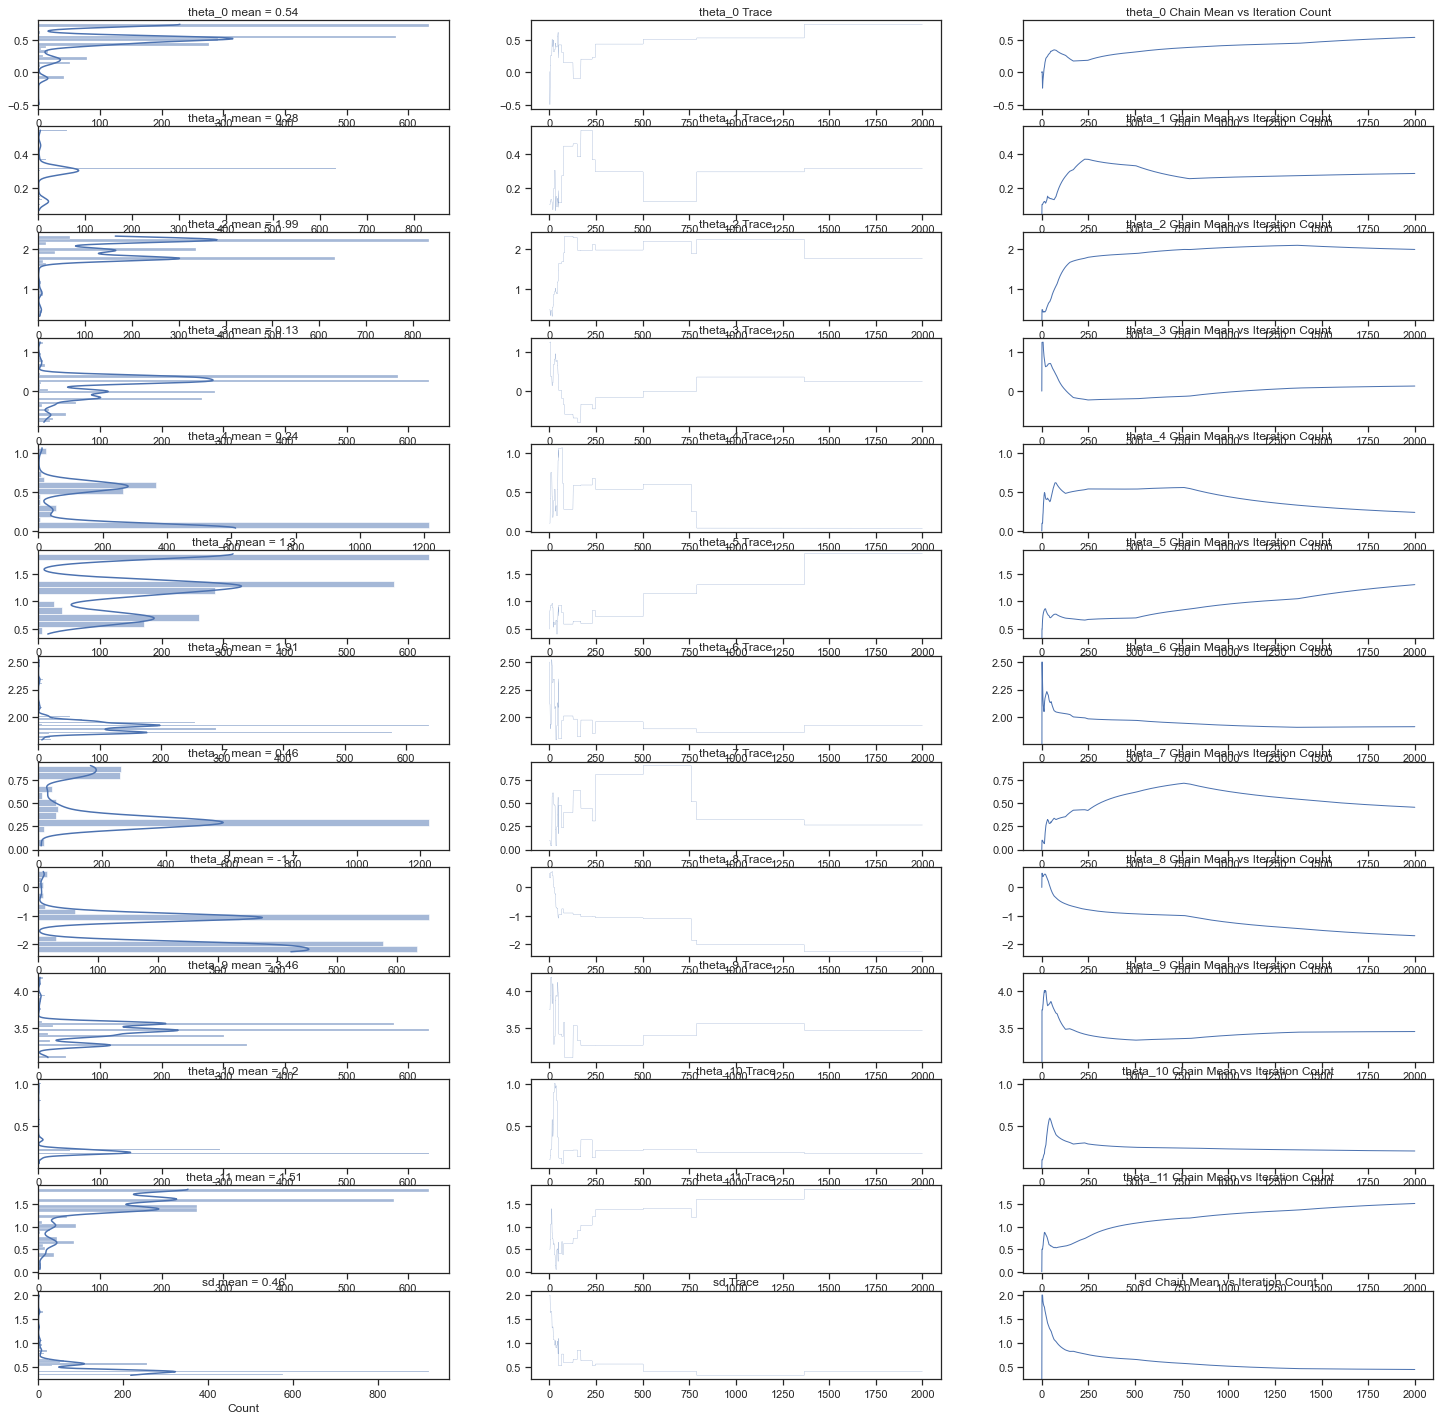

In [9]:
Plots.trace(gaussian=True,scaling=scaling)

## Plot Curves

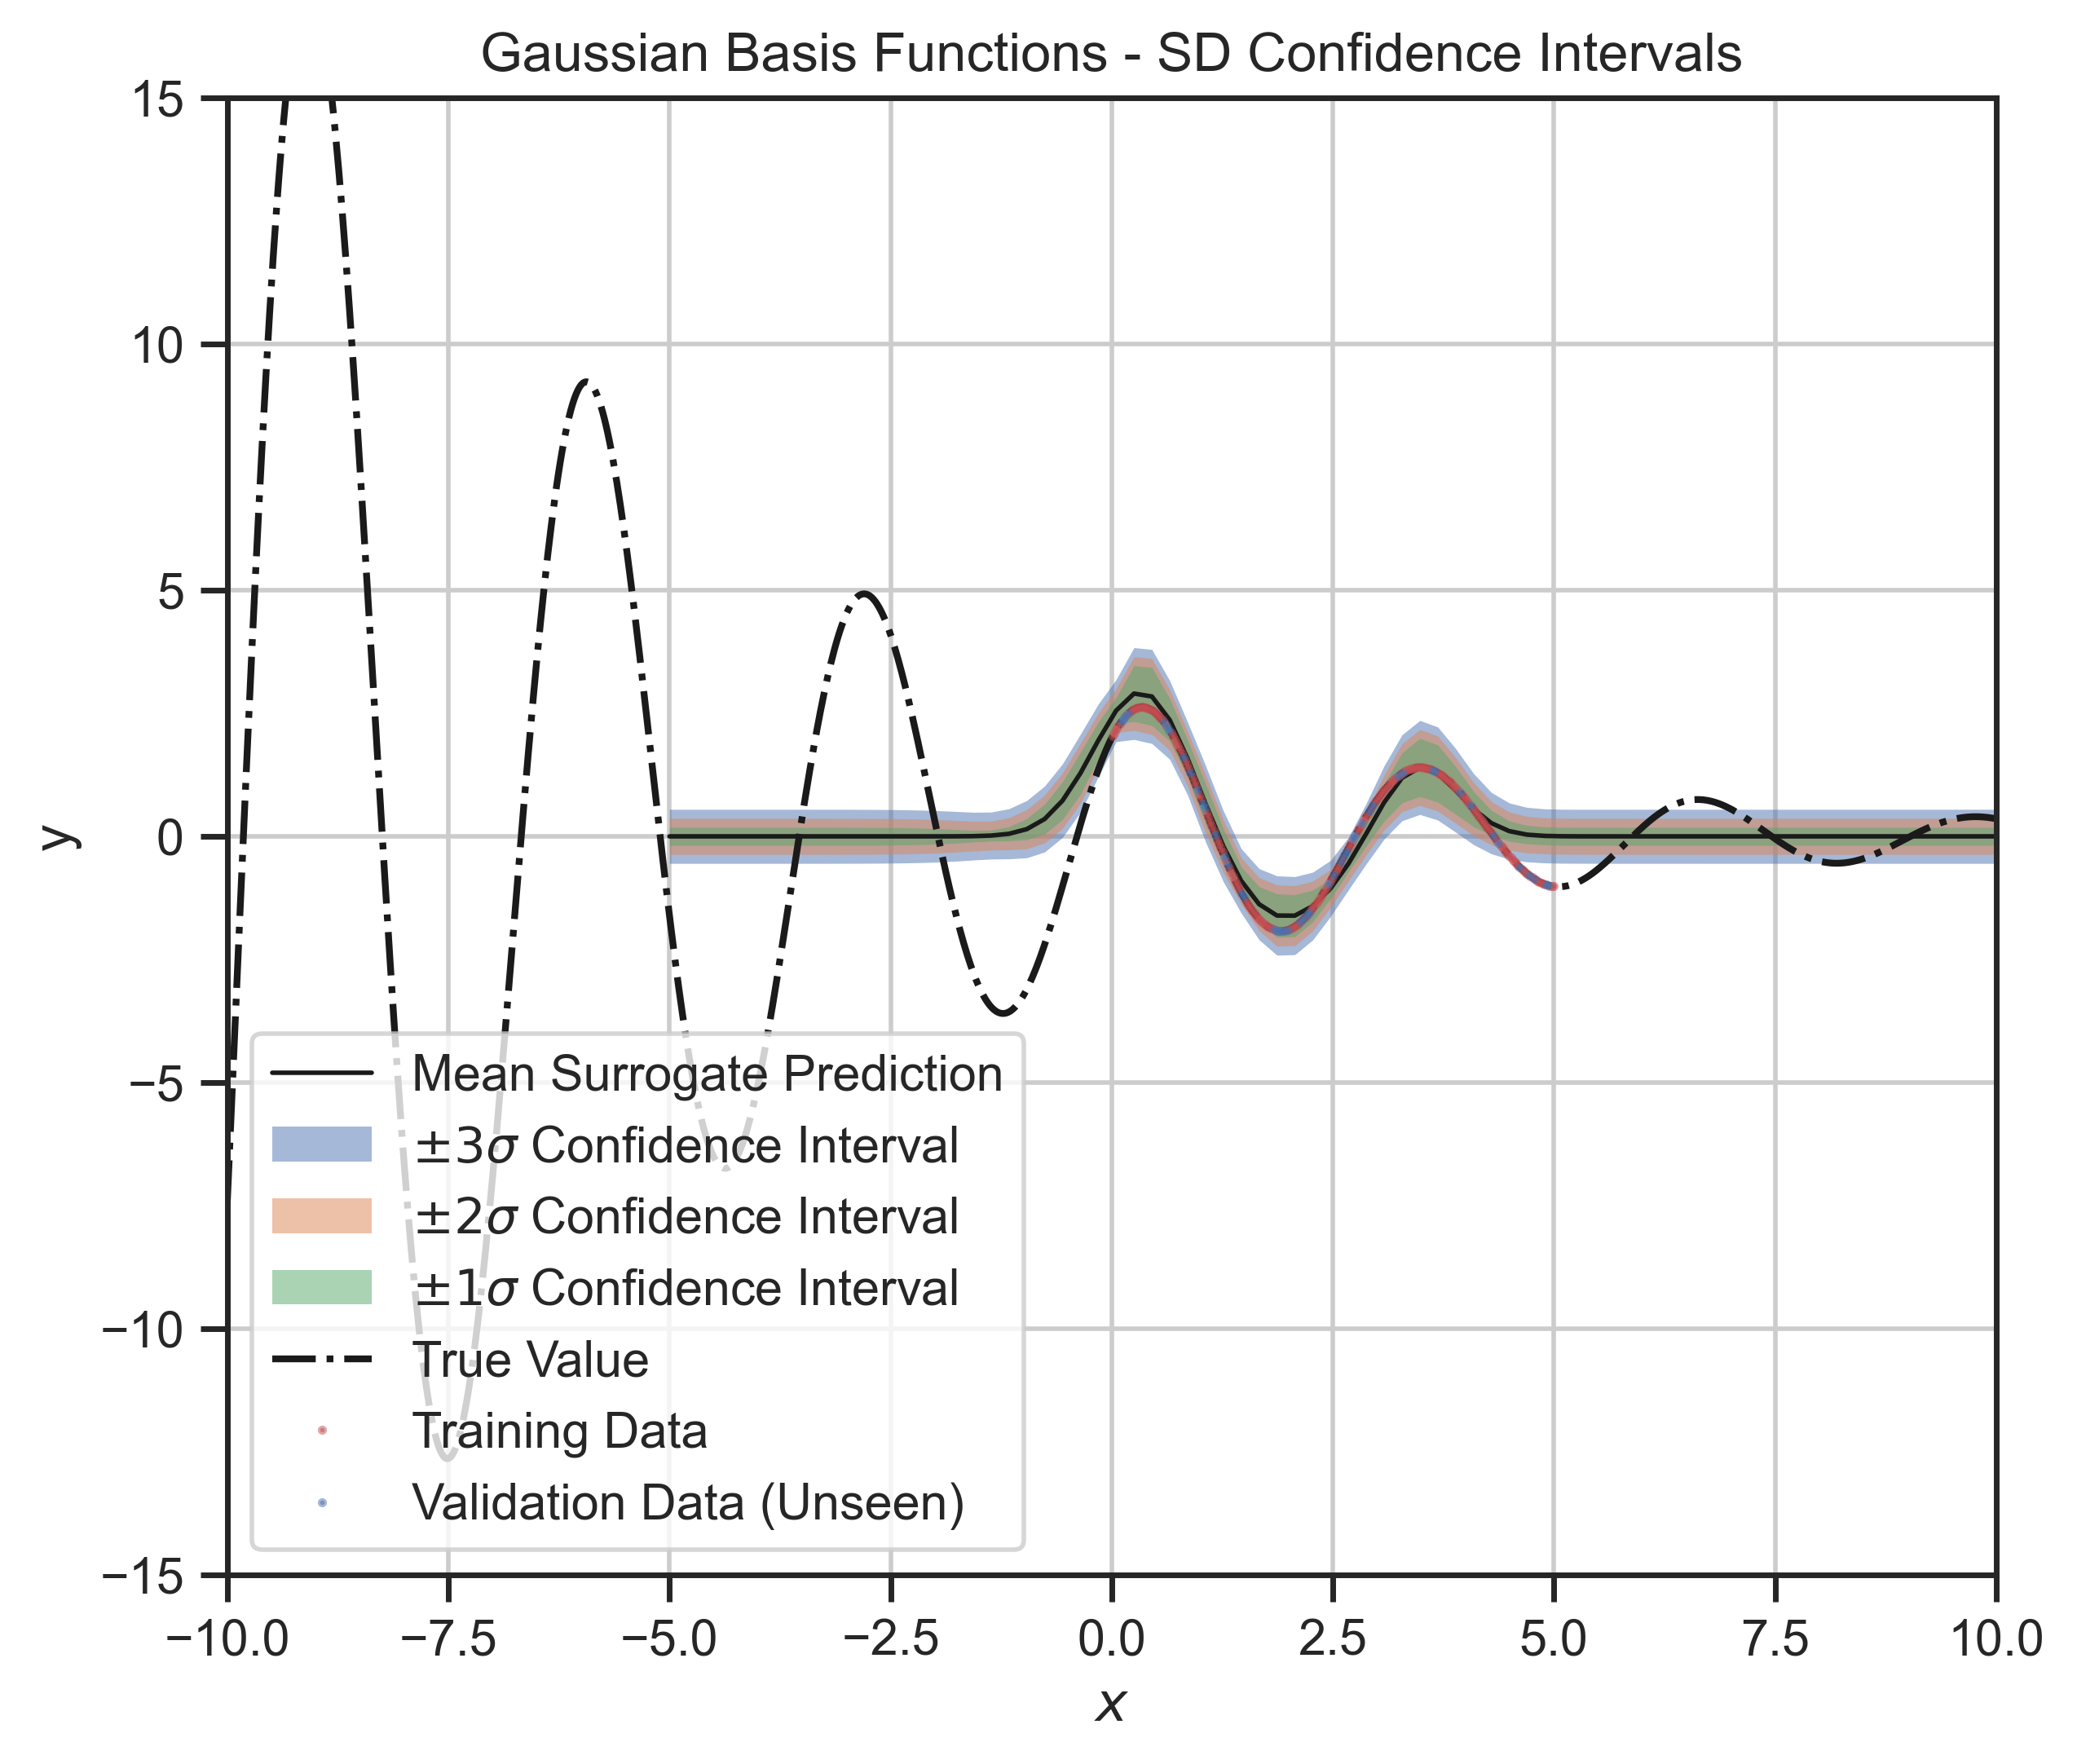

In [16]:

fig = Plots.curves(X_plot,
             Y_plot,
             plot_gaussians=False,
             ymin=-5,
             ymax=5,
             xmin=-5,
             xmax=15,
             figwidth=6,
             figheight=7,
             interval=True,
             uncertainty=1)

plt.plot(X, Y, 'k-.',markersize=0.9,label="True Value")
plt.plot(X[train_indices], Y[train_indices], 'or', alpha = 0.5, markersize=1, label="Training Data")
plt.plot(X[val_indices], Y[val_indices], 'ob', alpha=0.5, markersize=1, label="Validation Data (Unseen)")
plt.ylim((-15,15))
plt.xlim((-10,10))
plt.legend(loc="lower left")
plt.xlabel('$x$')
plt.title('Gaussian Basis Functions - SD Confidence Intervals')
plt.show()

## Animate Curves

KeyboardInterrupt: 

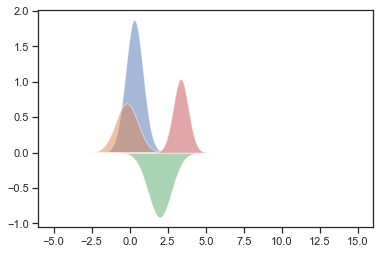

In [11]:
Plots.animate_curves(videoname="sin_data.avi",
                     frames=500,
                     framerate=20,
                     X=X,
                     Y=Y,
                     ymin=-5,
                     ymax=5,
                     xmin=-5,
                     xmax=15,
                     figwidth=8,
                     interval=False,
                     figheight=8,
                     uncertainty=1)

In [ ]:
from IPython.display import Video
Video("../curve_animations/movie.mp4",embed=True)